In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("Churn_Modelling.xlsx")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,4.0,15701354.0,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996.0,15606229.0,Obijiaku,771.0,France,Male,39.0,5.0,0.00,2.0,1.0,0.0,96270.64,0.0
9996,9997.0,15569892.0,Johnstone,516.0,France,Male,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0.0
9997,9998.0,15584532.0,Liu,709.0,France,Female,36.0,7.0,0.00,1.0,0.0,1.0,42085.58,1.0
9998,9999.0,15682355.0,Sabbatini,772.0,Germany,Male,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1.0


# EDA & Preprocessing

In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  float64
 1   CustomerId       10000 non-null  float64
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  float64
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  float64
 10  HasCrCard        10000 non-null  float64
 11  IsActiveMember   10000 non-null  float64
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  float64
dtypes: float64(11), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Handling Missing Values

In [7]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* No any missing value is there in this dataset.

## Handling Outliers

In [8]:
x = df.iloc[:,3:-1]
y = df.iloc[:,-1]

In [9]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771.0,France,Male,39.0,5.0,0.00,2.0,1.0,0.0,96270.64
9996,516.0,France,Male,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77
9997,709.0,France,Female,36.0,7.0,0.00,1.0,0.0,1.0,42085.58
9998,772.0,Germany,Male,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52


In [10]:
y

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    1.0
9998    1.0
9999    0.0
Name: Exited, Length: 10000, dtype: float64

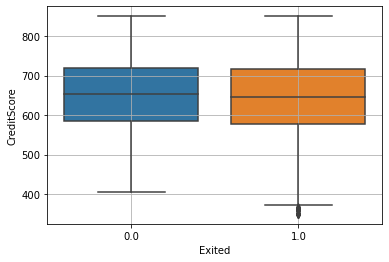

In [11]:
sns.boxplot(data=df, y="CreditScore",x="Exited")
plt.grid()

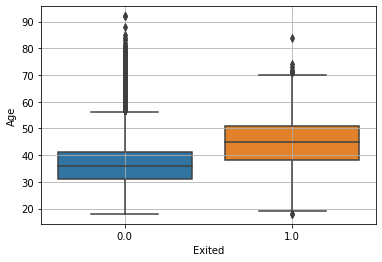

In [12]:
sns.boxplot(data=df, y="Age",x="Exited")
plt.grid()

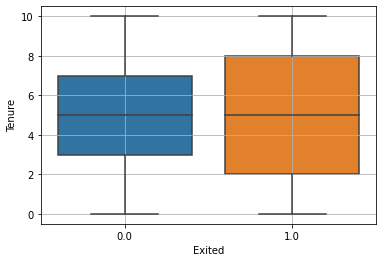

In [13]:
sns.boxplot(data=df, y="Tenure",x="Exited")
plt.grid()

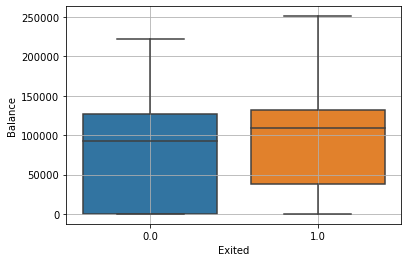

In [14]:
sns.boxplot(data=df, y="Balance",x="Exited")
plt.grid()

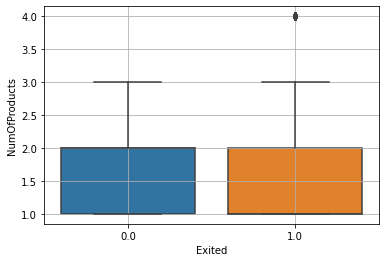

In [15]:
sns.boxplot(data=df, y="NumOfProducts",x="Exited")
plt.grid()

In [16]:
i = df[(df["NumOfProducts"] == 4.0) & (df["Exited"] == 1.0)].index
#df.drop(i , axis=0, inplace=True)
i

Int64Index([   7,   70, 1254, 1469, 1488, 1701, 1876, 2124, 2196, 2285, 2462,
            2499, 2509, 2541, 2614, 2617, 2872, 3152, 3365, 3841, 4013, 4014,
            4166, 4260, 4403, 4511, 4516, 4606, 4654, 4748, 4822, 5010, 5137,
            5235, 5386, 5700, 5904, 6150, 6172, 6279, 6750, 6875, 7257, 7457,
            7567, 7698, 7724, 7729, 8041, 8590, 8683, 8850, 8923, 9215, 9255,
            9323, 9370, 9411, 9540, 9565],
           dtype='int64')

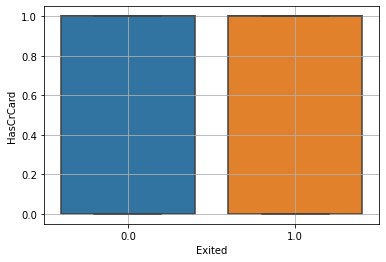

In [17]:
sns.boxplot(data=df, y="HasCrCard",x="Exited")
plt.grid()

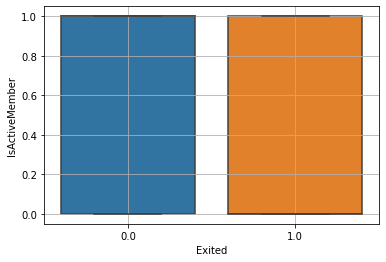

In [18]:
sns.boxplot(data=df, y="IsActiveMember",x="Exited")
plt.grid()

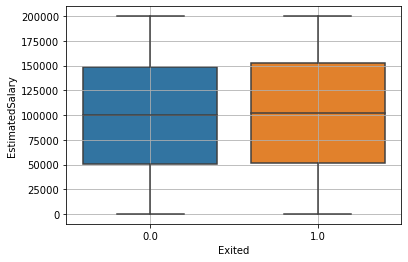

In [19]:
sns.boxplot(data=df, y="EstimatedSalary",x="Exited")
plt.grid()

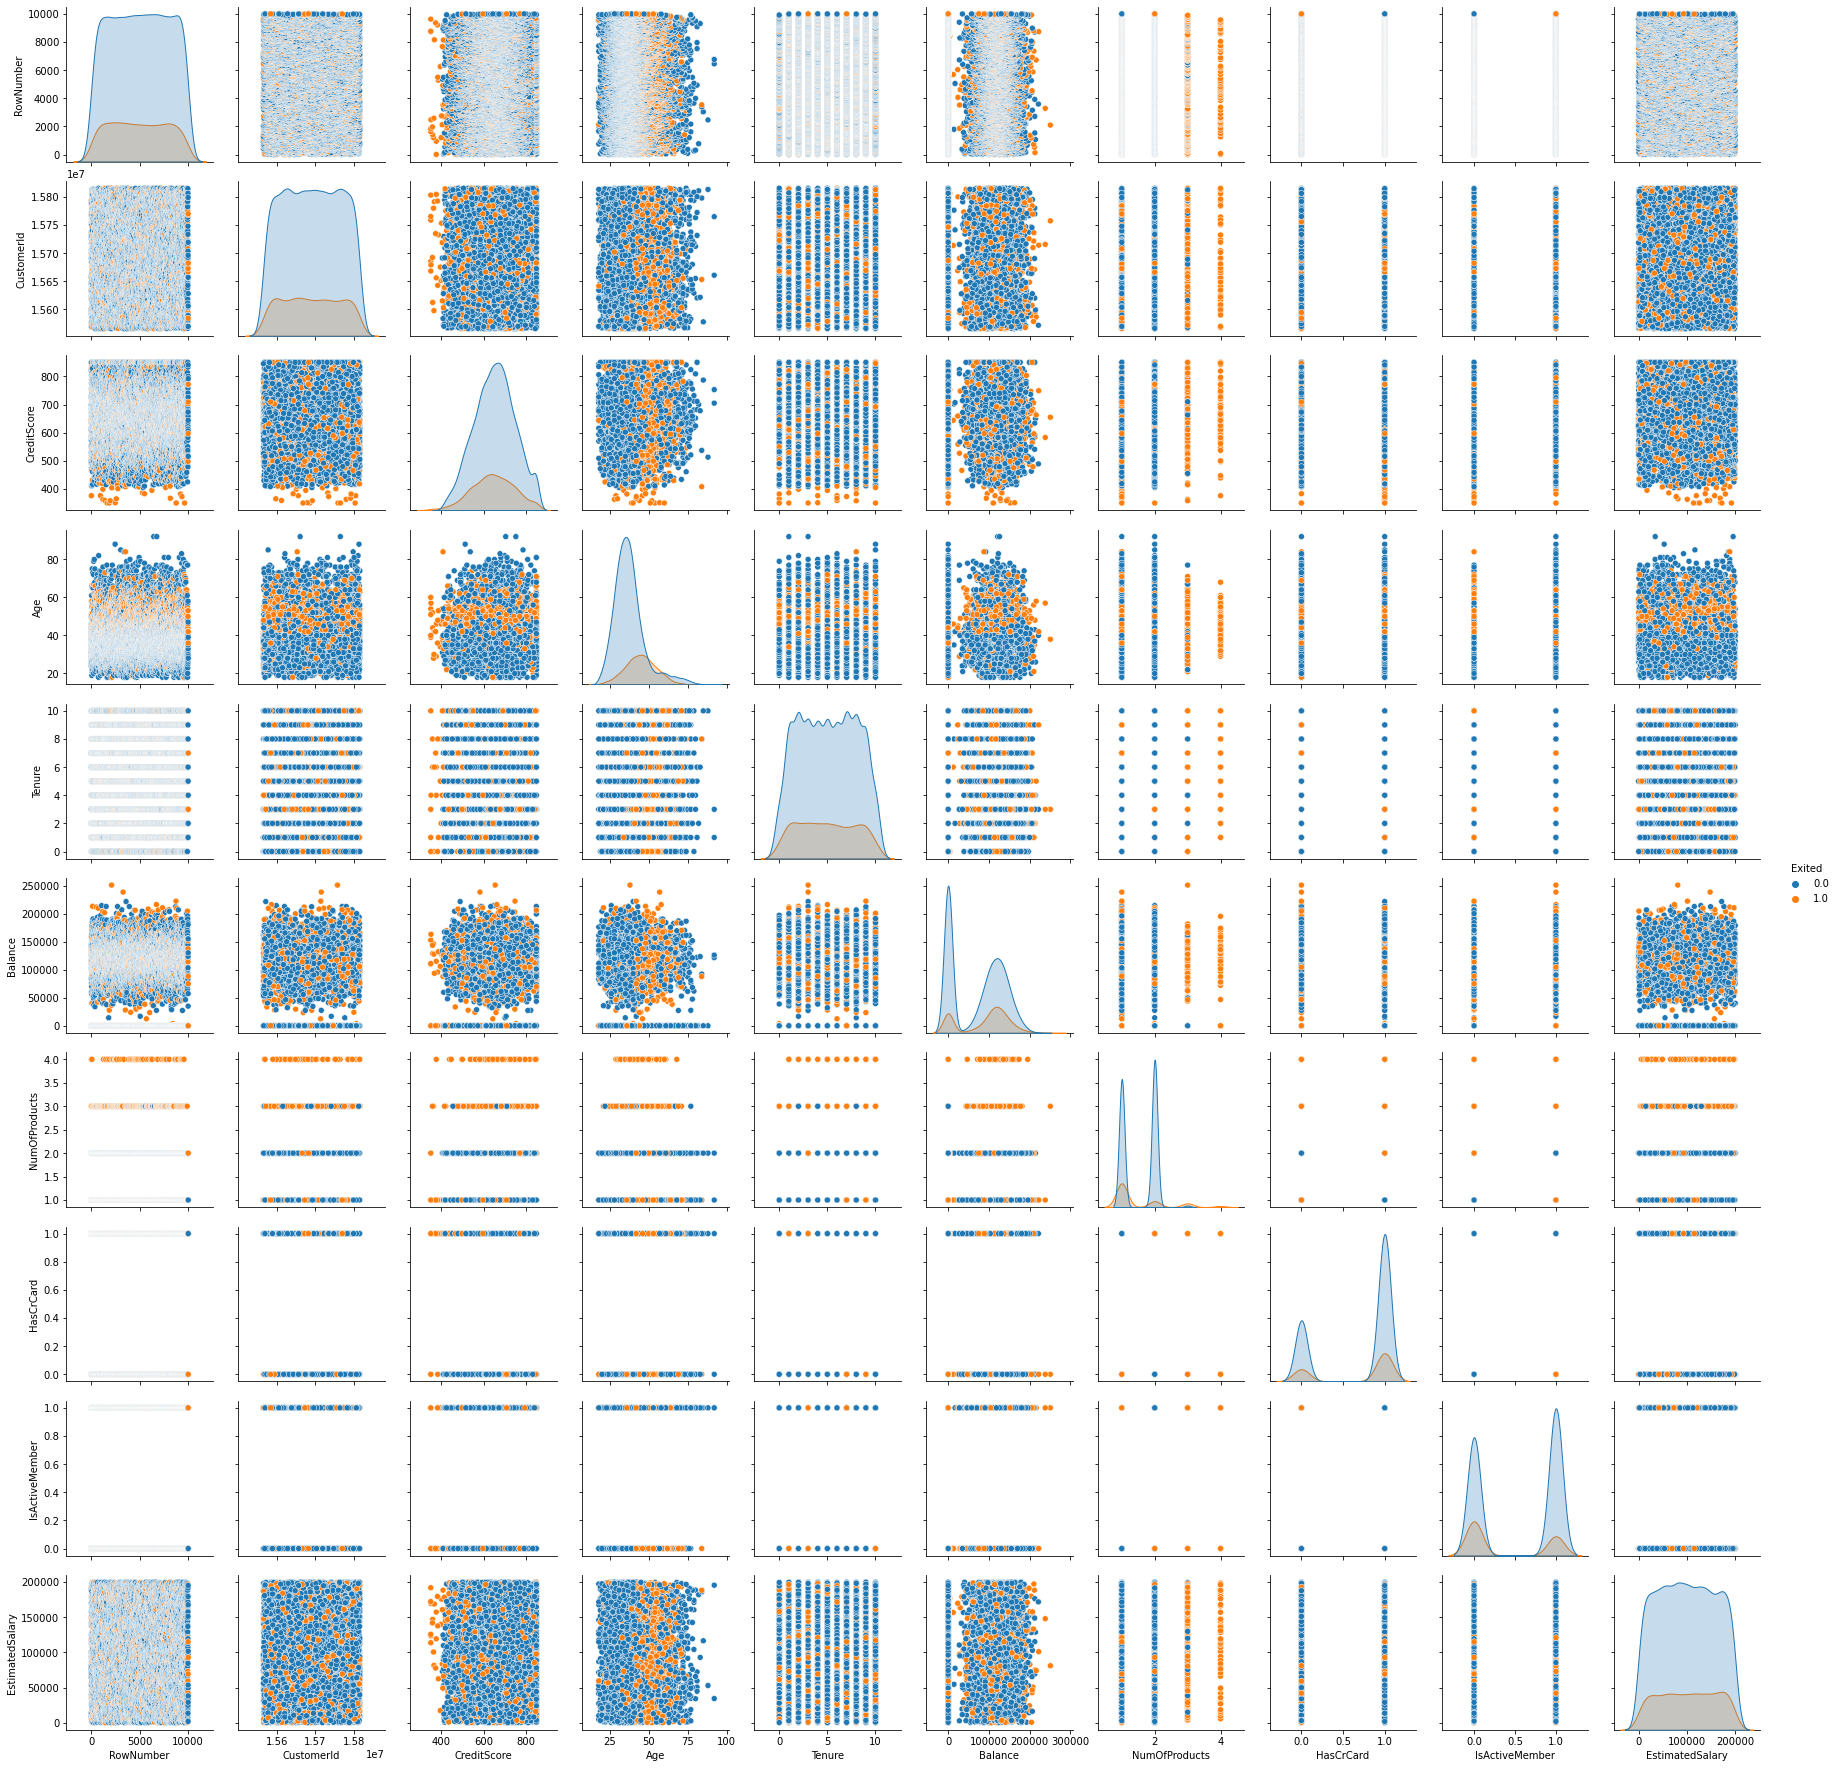

In [20]:
sns.pairplot(df, hue='Exited')

## Handling Skewness

In [21]:
numcols = x.select_dtypes(["int64","float64"]).columns

In [22]:
from scipy.stats import skew

CreditScore columns has skewness:-0.07159586676212397
Age columns has skewness:1.0111685586628079
Tenure columns has skewness:0.010989809189781041
Balance columns has skewness:-0.14108754375291138
NumOfProducts columns has skewness:0.745456048438949
HasCrCard columns has skewness:-0.9016763178640548
IsActiveMember columns has skewness:-0.06042756246298516
EstimatedSalary columns has skewness:0.0020850448448748848


<Figure size 360x144 with 0 Axes>

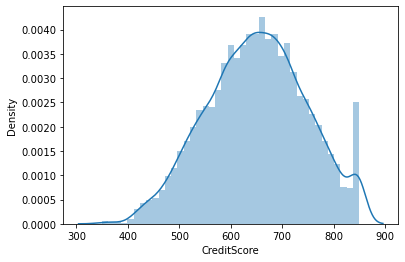

<Figure size 360x144 with 0 Axes>

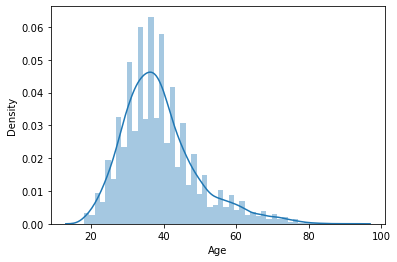

<Figure size 360x144 with 0 Axes>

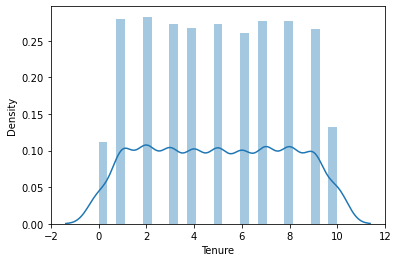

<Figure size 360x144 with 0 Axes>

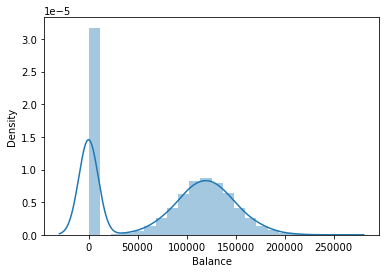

<Figure size 360x144 with 0 Axes>

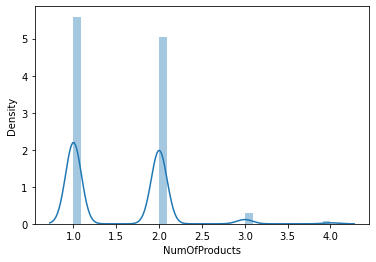

<Figure size 360x144 with 0 Axes>

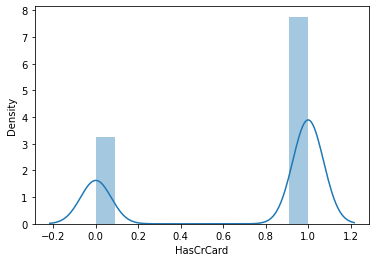

<Figure size 360x144 with 0 Axes>

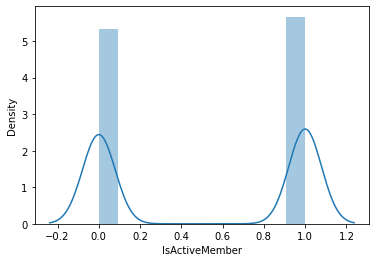

<Figure size 360x144 with 0 Axes>

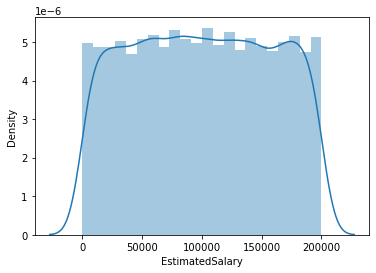

In [23]:
for i in numcols:
    print(f"{i} columns has skewness:{skew(x[i])}")
    
    plt.figure(figsize=(5,2))
    plt.figure()
    sns.distplot(x[i])

In [24]:
pd.concat([x,y], axis=1).corr().style.background_gradient()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [25]:
pd.concat([x,y], axis=1).corr()["Exited"].sort_values()

IsActiveMember    -0.156128
NumOfProducts     -0.047820
CreditScore       -0.027094
Tenure            -0.014001
HasCrCard         -0.007138
EstimatedSalary    0.012097
Balance            0.118533
Age                0.285323
Exited             1.000000
Name: Exited, dtype: float64

In [26]:
skew(x["EstimatedSalary"])

0.0020850448448748848

In [27]:
skew(x["Balance"])

-0.14108754375291138

In [28]:
skew(x["Age"])

1.0111685586628079

## Encoding

In [29]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

catcols = x.select_dtypes(object).columns

x[catcols] = oe.fit_transform(x[catcols])
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619.0,0.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,608.0,2.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,502.0,0.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,699.0,0.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,850.0,2.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771.0,0.0,1.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64
9996,516.0,0.0,1.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77
9997,709.0,0.0,0.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58
9998,772.0,1.0,1.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52


## Data Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

x.iloc[:,:] = std.fit_transform(x.iloc[:,:])
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,-0.901886,0.912419,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419
9996,-1.391939,-0.901886,0.912419,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988
9997,0.604988,-0.901886,-1.095988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643
9998,1.256835,0.306591,0.912419,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231


## Model Building

In [31]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [32]:
# Classification Models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score



In [33]:
def models(model):
    
    model = model.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    
    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    
    print(f"Training accuracy:{train}\nTesting accuracy:{test}")
    print(classification_report(ytest,pred))
    return model

In [34]:
# Logistic Regression
models(LogisticRegression())

Training accuracy:0.8104285714285714
Testing accuracy:0.8073333333333333
              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      2373
         1.0       0.64      0.18      0.28       627

    accuracy                           0.81      3000
   macro avg       0.73      0.58      0.59      3000
weighted avg       0.78      0.81      0.76      3000



LogisticRegression()

In [35]:
models(KNeighborsClassifier())

Training accuracy:0.8765714285714286
Testing accuracy:0.8246666666666667
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90      2373
         1.0       0.64      0.37      0.47       627

    accuracy                           0.82      3000
   macro avg       0.74      0.66      0.68      3000
weighted avg       0.81      0.82      0.81      3000



KNeighborsClassifier()

In [36]:
models(SVC())

Training accuracy:0.8644285714285714
Testing accuracy:0.8576666666666667
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92      2373
         1.0       0.84      0.39      0.53       627

    accuracy                           0.86      3000
   macro avg       0.85      0.69      0.73      3000
weighted avg       0.86      0.86      0.84      3000



SVC()

In [37]:
models(DecisionTreeClassifier())

Training accuracy:1.0
Testing accuracy:0.799
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87      2373
         1.0       0.52      0.54      0.53       627

    accuracy                           0.80      3000
   macro avg       0.70      0.70      0.70      3000
weighted avg       0.80      0.80      0.80      3000



DecisionTreeClassifier()

In [38]:
# Tuning of Decision Tree
paramaters = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(1, 20)),
    "min_samples_leaf": list(range(1, 20))
}

In [39]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), paramaters, verbose=2)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 722 candidates, totalling 3610 fits
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min

[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=19; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=19; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=19; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=19; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=9; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=16, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END criterion=entropy, max_depth=1, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=19; total time=   0.0s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=8, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=9, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=10, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=16; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=11, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=18; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=12, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=19; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=13, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=en

[CV] END criterion=entropy, max_depth=15, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=16, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=17, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=18, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=19, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, 

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             verbose=2)

In [40]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 13}

In [41]:
dt = models(DecisionTreeClassifier(max_depth=5, min_samples_leaf=13))

Training accuracy:0.8571428571428571
Testing accuracy:0.8533333333333334
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91      2373
         1.0       0.81      0.39      0.52       627

    accuracy                           0.85      3000
   macro avg       0.84      0.68      0.72      3000
weighted avg       0.85      0.85      0.83      3000



In [42]:
from sklearn import tree

[Text(611.4255319148937, 747.4499999999999, 'X[3] <= 0.341\ngini = 0.322\nsamples = 7000\nvalue = [5590, 1410]'),
 Text(344.29787234042556, 611.55, 'X[6] <= 1.667\ngini = 0.207\nsamples = 4993\nvalue = [4407, 586]'),
 Text(189.95744680851064, 475.65, 'X[6] <= -0.052\ngini = 0.184\nsamples = 4874\nvalue = [4375, 499]'),
 Text(94.97872340425532, 339.74999999999994, 'X[8] <= -0.03\ngini = 0.271\nsamples = 2403\nvalue = [2014, 389]'),
 Text(47.48936170212766, 203.8499999999999, 'X[3] <= -0.04\ngini = 0.336\nsamples = 1216\nvalue = [956, 260]'),
 Text(23.74468085106383, 67.94999999999993, 'gini = 0.29\nsamples = 931\nvalue = [767, 164]'),
 Text(71.23404255319149, 67.94999999999993, 'gini = 0.447\nsamples = 285\nvalue = [189, 96]'),
 Text(142.46808510638297, 203.8499999999999, 'X[3] <= -0.326\ngini = 0.194\nsamples = 1187\nvalue = [1058, 129]'),
 Text(118.72340425531915, 67.94999999999993, 'gini = 0.137\nsamples = 691\nvalue = [640, 51]'),
 Text(166.2127659574468, 67.94999999999993, 'gini = 

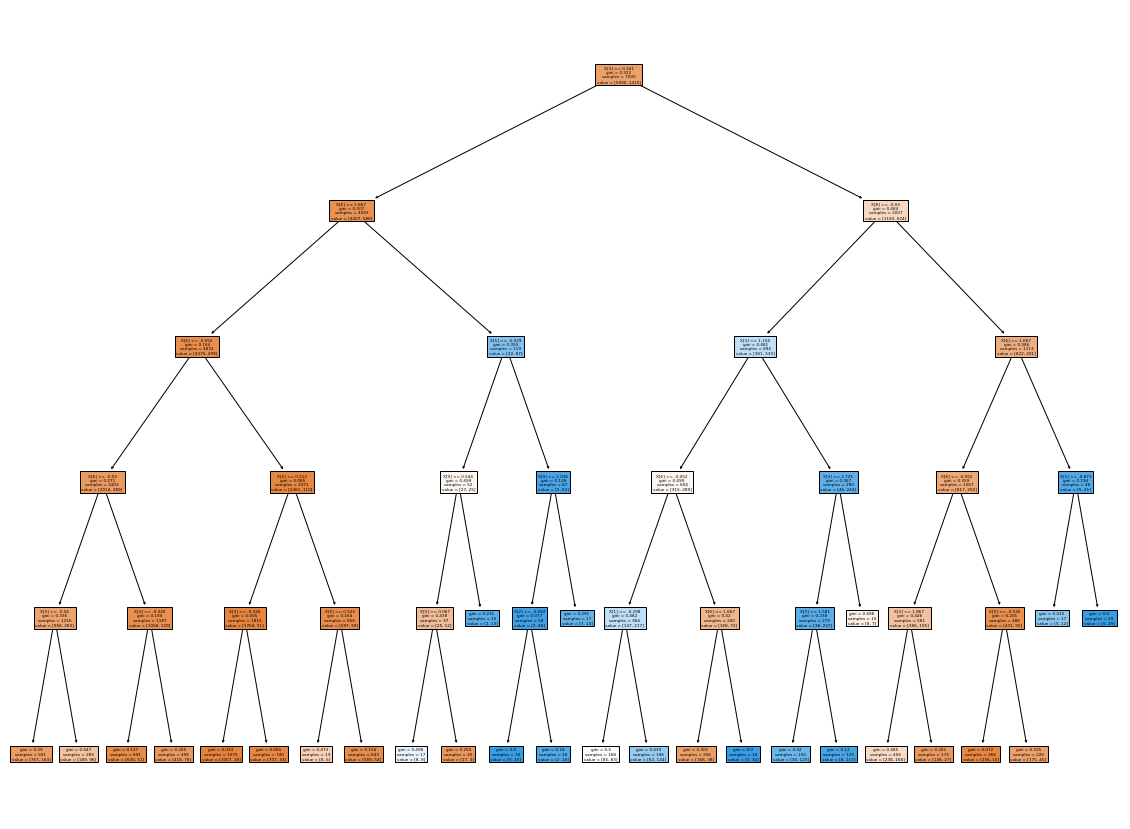

In [43]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=13)
dt.fit(xtrain,ytrain)
fig,ax = plt.subplots(figsize=(20,15))
tree.plot_tree(dt, filled=True)

In [44]:
# Cross Validation

In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
cv = cross_val_score(dt,x,y,cv=5, scoring = "accuracy")

In [47]:
cv

array([0.8525, 0.8595, 0.8525, 0.861 , 0.842 ])

In [48]:
cv.mean()

0.8535

In [49]:
# Tuning of KNN

In [50]:
testac = []
trainac = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    train = knn.score(xtrain,ytrain)
    test = knn.score(xtest,ytest)
    
    trainac.append(train)
    testac.append(test)

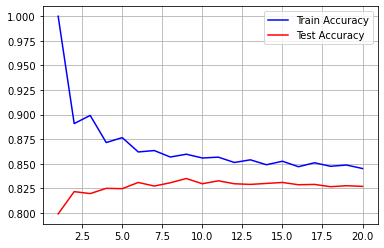

In [51]:
plt.plot(range(1,21),trainac, color="b", label="Train Accuracy")
plt.plot(range(1,21),testac, color="r", label="Test Accuracy")
plt.grid()
plt.legend()

In [52]:
#knn = models(KNeighborsClassifier(n_neighbors=))

In [53]:
# Naive Bayes Algorithm

In [54]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [55]:
models(GaussianNB())

Training accuracy:0.835
Testing accuracy:0.827
              precision    recall  f1-score   support

         0.0       0.83      0.99      0.90      2373
         1.0       0.82      0.22      0.35       627

    accuracy                           0.83      3000
   macro avg       0.82      0.60      0.62      3000
weighted avg       0.83      0.83      0.78      3000



GaussianNB()

In [56]:
models(BernoulliNB())

Training accuracy:0.811
Testing accuracy:0.8063333333333333
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89      2373
         1.0       0.58      0.26      0.36       627

    accuracy                           0.81      3000
   macro avg       0.71      0.61      0.62      3000
weighted avg       0.78      0.81      0.78      3000



BernoulliNB()

In [57]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [58]:
models(AdaBoostClassifier())

Training accuracy:0.8598571428571429
Testing accuracy:0.8576666666666667
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      2373
         1.0       0.75      0.48      0.58       627

    accuracy                           0.86      3000
   macro avg       0.81      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



AdaBoostClassifier()

In [59]:
models(GradientBoostingClassifier())

Training accuracy:0.8734285714285714
Testing accuracy:0.8623333333333333
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      2373
         1.0       0.80      0.45      0.58       627

    accuracy                           0.86      3000
   macro avg       0.84      0.71      0.75      3000
weighted avg       0.86      0.86      0.85      3000



GradientBoostingClassifier()

In [60]:
from xgboost import XGBClassifier

In [61]:
models(XGBClassifier())

Training accuracy:0.9611428571428572
Testing accuracy:0.862
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      2373
         1.0       0.75      0.50      0.60       627

    accuracy                           0.86      3000
   macro avg       0.82      0.73      0.76      3000
weighted avg       0.85      0.86      0.85      3000



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [62]:
models(XGBClassifier(max_depth=2))

Training accuracy:0.8748571428571429
Testing accuracy:0.8626666666666667
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      2373
         1.0       0.79      0.47      0.59       627

    accuracy                           0.86      3000
   macro avg       0.83      0.72      0.75      3000
weighted avg       0.86      0.86      0.85      3000



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [63]:
from sklearn.ensemble import BaggingClassifier

In [64]:
models(BaggingClassifier(LogisticRegression()))

Training accuracy:0.8104285714285714
Testing accuracy:0.8083333333333333
              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      2373
         1.0       0.65      0.18      0.28       627

    accuracy                           0.81      3000
   macro avg       0.73      0.58      0.59      3000
weighted avg       0.78      0.81      0.76      3000



BaggingClassifier(base_estimator=LogisticRegression())

# Conclusion

             Models                              Training Acccuracy         Testing Accuracy         Accuracy 
    
    1.  Logistic Regression                            0.81                       0.80                  0.81
    2.  SVC                                            0.86                       0.85                  0.86
    4.  Decision Tree Classifier (Tuned)               0.85                       0.85                  0.85
    5.  Naive Bayes (GaussianNB)                       0.83                       0.82                  0.83                         6.  Naive Bayes (BernoulliNB)                      0.81                       0.80                  0.81                                    
      * Ensembled Techniques
    6.  AdaBoost Classifier                            0.85                       0.85                  0.85
    7.  GradientBoost Classifier                       0.87                       0.86                  0.86
    8.  XGBClassifier (Tuned)                          0.87                       0.86                  0.86
    9.  BaggingClassifier(LogisticRegression)          0.81                       0.80                  0.81

### Observation :

* In model buliding and evaluation part we have used 9 alorithms.

* Among them all the models are giving generalised models but SVC, Tuned Decision Tree Classifier, AdaBoost Classifier, GradientBoost Classifier, Tuned XGBClassifier are giving good accuracy of model.
